# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/city_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#build query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#empty lists to store retrieved data
cityNameList = []
latList = []
lngList = []
maxTempList= []
humidityList = []
cloudinessList = []
windSpeedList = []
countryList = []
dateList = []

#counter variables
record = 0 
log_set = 1

print("Beginning Data Retrieval")
print("------------------------")

#loop through cities
for city in cities:
        
    #get the weather data    
    weather_json = requests.get(query_url + city).json()
    
    try:
        # Get weather data
        
        #store information and add to lists
        cityName = weather_json["name"]
        cityNameList.append(cityName)
        
        lat = weather_json["coord"]["lat"]
        latList.append(lat)
        
        lng = weather_json["coord"]["lon"]
        lngList.append(lng)
        
        maxTemp = weather_json["main"]["temp_max"]
        maxTempList.append(maxTemp)
        
        humidity = weather_json["main"]["humidity"]
        humidityList.append(humidity)
        
        cloudiness = weather_json["clouds"]["all"]
        cloudinessList.append(cloudiness)
        
        windSpeed = weather_json["wind"]["speed"]
        windSpeedList.append(windSpeed)
        
        country = weather_json["sys"]["country"]
        countryList.append(country)
        
        date = weather_json["dt"]
        dateList.append(date)
        
        #prints log of each city 
        print(f"Processing Record {record} of Set {log_set} | {city}")
        
        if record <= 49:
            record +=1
        
        else:
            record = 0
            log_set+=1
      
    except:
        print("City not found - skipping.")

Beginning Data Retrieval
------------------------
City not found - skipping.
Processing Record 0 of Set 1 | namibe
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | flinders
Processing Record 3 of Set 1 | grindavik
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | grenfell
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | muros
City not found - skipping.
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | ballina
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | uberaba
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | atherton
Processing Record 19 of Set 1 | lunenburg
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | saskylakh
Processin

Processing Record 36 of Set 4 | taoudenni
Processing Record 37 of Set 4 | port lincoln
Processing Record 38 of Set 4 | carnarvon
Processing Record 39 of Set 4 | kantang
Processing Record 40 of Set 4 | honiara
Processing Record 41 of Set 4 | bari
Processing Record 42 of Set 4 | mangrol
Processing Record 43 of Set 4 | alta floresta
Processing Record 44 of Set 4 | nouadhibou
Processing Record 45 of Set 4 | buraydah
Processing Record 46 of Set 4 | erdenet
City not found - skipping.
Processing Record 47 of Set 4 | alekseyevsk
Processing Record 48 of Set 4 | kongoussi
Processing Record 49 of Set 4 | arlit
City not found - skipping.
Processing Record 50 of Set 4 | coromandel
Processing Record 0 of Set 5 | jacqueville
City not found - skipping.
Processing Record 1 of Set 5 | kieta
Processing Record 2 of Set 5 | peace river
Processing Record 3 of Set 5 | hamilton
City not found - skipping.
Processing Record 4 of Set 5 | baturaja
Processing Record 5 of Set 5 | dingle
Processing Record 6 of Set 5

Processing Record 23 of Set 8 | kenai
Processing Record 24 of Set 8 | westport
Processing Record 25 of Set 8 | kahului
City not found - skipping.
Processing Record 26 of Set 8 | kuandian
Processing Record 27 of Set 8 | sembe
Processing Record 28 of Set 8 | caceres
Processing Record 29 of Set 8 | skjervoy
Processing Record 30 of Set 8 | hulan ergi
Processing Record 31 of Set 8 | svetlogorsk
Processing Record 32 of Set 8 | yar-sale
Processing Record 33 of Set 8 | bereda
Processing Record 34 of Set 8 | sur
Processing Record 35 of Set 8 | ratnagiri
Processing Record 36 of Set 8 | yerbogachen
Processing Record 37 of Set 8 | mar del plata
Processing Record 38 of Set 8 | becerril
Processing Record 39 of Set 8 | clyde river
Processing Record 40 of Set 8 | sarangani
Processing Record 41 of Set 8 | rio grande
Processing Record 42 of Set 8 | emba
Processing Record 43 of Set 8 | vilyuysk
Processing Record 44 of Set 8 | chapais
Processing Record 45 of Set 8 | san quintin
Processing Record 46 of Set

Processing Record 6 of Set 12 | sinnamary
City not found - skipping.
Processing Record 7 of Set 12 | bratsk
Processing Record 8 of Set 12 | auki
Processing Record 9 of Set 12 | nishihara
Processing Record 10 of Set 12 | gazimurskiy zavod
Processing Record 11 of Set 12 | tual
City not found - skipping.
Processing Record 12 of Set 12 | ardakan
Processing Record 13 of Set 12 | karachi
Processing Record 14 of Set 12 | maldonado
Processing Record 15 of Set 12 | galle
Processing Record 16 of Set 12 | batagay-alyta
Processing Record 17 of Set 12 | lebedinyy
Processing Record 18 of Set 12 | erie
Processing Record 19 of Set 12 | kawalu
Processing Record 20 of Set 12 | la asuncion
Processing Record 21 of Set 12 | laguna de perlas
Processing Record 22 of Set 12 | polunochnoye
Processing Record 23 of Set 12 | chern
Processing Record 24 of Set 12 | gonbad-e qabus


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create dataframe
city_df = pd.DataFrame({"City": cityNameList, "Lat": latList, "Lng": lngList, "Max Temp": maxTempList,
                       "Humidity": humidityList, "Cloudiness": cloudinessList, "Wind Speed": windSpeedList,
                       "Country": countryList, "Date": dateList})
#display dataframe
city_df.head()

#export to csvfile 
city_df.to_csv(output_data_file, index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#identify cities with humidity > 100
high_humidity = city_df.loc[city_df["Humidity"] > int(100)]
high_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

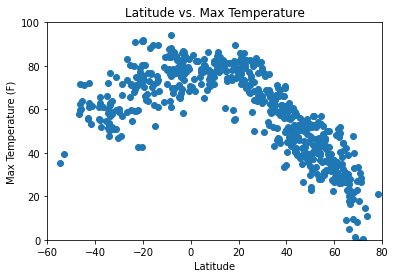

<Figure size 432x288 with 0 Axes>

In [8]:
#scatter plot of the data
plt.scatter(city_df["Lat"], city_df["Max Temp"])

#labels
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#axes limits
plt.ylim(0, 100)
plt.xlim(-60, 80)

#display the plot
plt.show()

#save image
plt.savefig("Images/lat_temp.png")

## Latitude vs. Humidity Plot

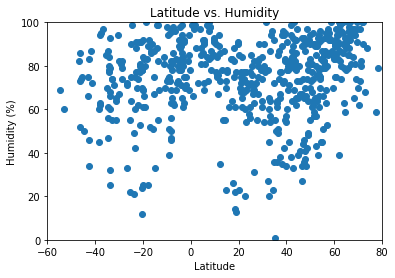

<Figure size 432x288 with 0 Axes>

In [9]:
#scatter plot of the data
plt.scatter(city_df["Lat"], city_df["Humidity"])

#labels
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#axes limits
plt.ylim(0, 100)
plt.xlim(-60, 80)

#display the plot
plt.show()

#save image
plt.savefig("Images/lat_humidity.png")

## Latitude vs. Cloudiness Plot

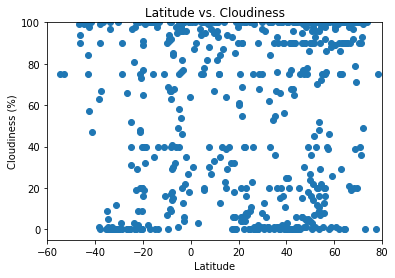

<Figure size 432x288 with 0 Axes>

In [10]:
#scatter plot of the data
plt.scatter(city_df["Lat"], city_df["Cloudiness"])

#labels
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#axes limits
plt.ylim(-5, 100)
plt.xlim(-60, 80)

#display the plot
plt.show()

#save image
plt.savefig("Images/lat_cloudiness.png")

## Latitude vs. Wind Speed Plot

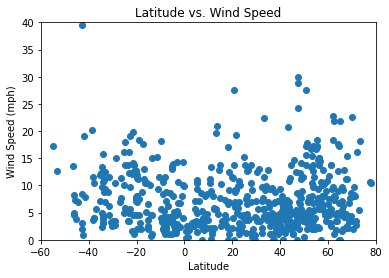

<Figure size 432x288 with 0 Axes>

In [11]:
#scatter plot of the data
plt.scatter(city_df["Lat"], city_df["Wind Speed"])

#labels
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#axes limits
plt.ylim(0, 40)
plt.xlim(-60, 80)

#display the plot
plt.show()

#save image
plt.savefig("Images/lat_windspeed.png")

## Linear Regression

In [12]:
#create northern and southern hemisphere variables
northern_hemisphere = city_df.loc[city_df["Lat"] > 0 ]
southern_hemisphere = city_df.loc[city_df["Lat"] < 0 ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between northen hemisphere latitude and max temperature is -0.89.


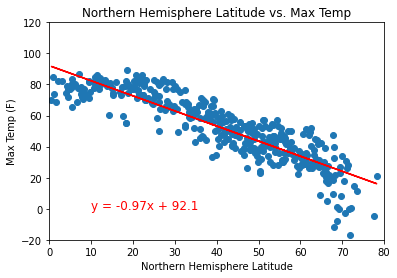

<Figure size 432x288 with 0 Axes>

In [13]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between northen hemisphere latitude and max temperature is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# linear regression line 
yvalues = (northern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
plt.plot(northern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(10,0),fontsize=12,color="red")
plt.title("Northern Hemisphere Latitude vs. Max Temp")
plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Max Temp (F)")

#axes limits
plt.ylim(-20, 120)
plt.xlim(0, 80)

#display plot
plt.show()

#save image
plt.savefig("Images/nh_lat_temp_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation southern hemisphere latitude and max temperature is 0.63.


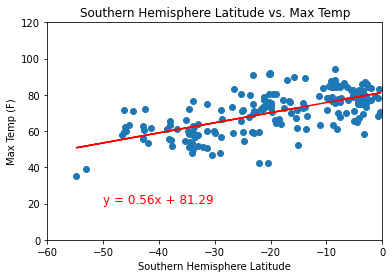

<Figure size 432x288 with 0 Axes>

In [14]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation southern hemisphere latitude and max temperature is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# linear regression line 
yvalues = (southern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
plt.plot(southern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(-50, 20),fontsize=12,color="red")
plt.title("Southern Hemisphere Latitude vs. Max Temp")
plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Max Temp (F)")

#axes limits
plt.ylim(0, 120)
plt.xlim(-60, 0)

#display plot
plt.show()

#save image
plt.savefig("Images/sh_lat_temp_regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between northern hemisphere latitude and humidity is 0.15.


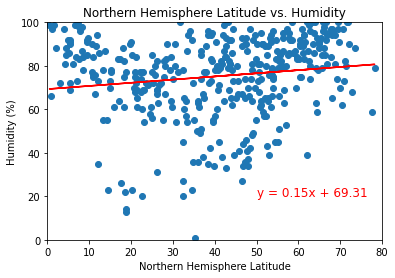

<Figure size 432x288 with 0 Axes>

In [15]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between northern hemisphere latitude and humidity is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# linear regression line 
yvalues = (northern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
plt.plot(northern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(50, 20),fontsize=12,color="red")
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Humidity (%)")

#axes limits
plt.ylim(0, 100)
plt.xlim(0, 80)

#display the plot 
plt.show()

#save image
plt.savefig("Images/nh_lat_humidity_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between southern hemisphere latitude and humidity is 0.23.


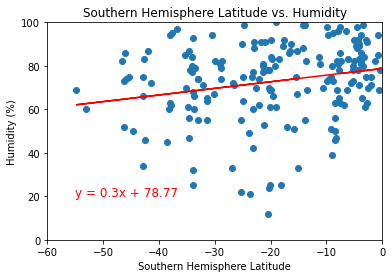

<Figure size 432x288 with 0 Axes>

In [16]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between southern hemisphere latitude and humidity is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# linear regression line 
yvalues = (southern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
plt.plot(southern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(-55, 20),fontsize=12,color="red")
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Humidity (%)")

#axes limits
plt.ylim(0, 100)
plt.xlim(-60, 0)

#display the plot
plt.show()

#save image
plt.savefig("Images/sh_lat_humidity_regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between northern hemisphere latitude and cloudiness is 0.10.


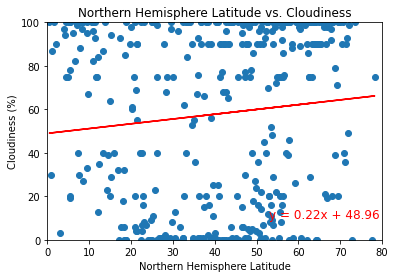

<Figure size 432x288 with 0 Axes>

In [17]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between northern hemisphere latitude and cloudiness is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# linear regression line 
yvalues = (northern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
plt.plot(northern_hemisphere["Lat"], yvalues, color = "red")

#annotiation and labels
plt.annotate(line_eq,(53, 10),fontsize=12,color="red")
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel ("Northern Hemisphere Latitude")
plt.ylabel ("Cloudiness (%)")

#axes limits
plt.ylim(0, 100)
plt.xlim(0, 80)

#display the plot
plt.show()

#save image
plt.savefig("Images/nh_lat_cloudiness_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between southern hemisphere latitude and cloudiness is 0.13.


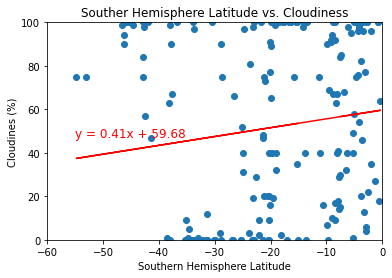

<Figure size 432x288 with 0 Axes>

In [18]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between southern hemisphere latitude and cloudiness is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# linear regression line 
yvalues = (southern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
plt.plot(southern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(-55, 47),fontsize=12,color="red")
plt.title("Souther Hemisphere Latitude vs. Cloudiness")
plt.xlabel ("Southern Hemisphere Latitude")
plt.ylabel ("Cloudines (%)")

#axes limits
plt.ylim(0, 100)
plt.xlim(-60, 0)

#display the plot
plt.show()

#save image
plt.savefig("Images/sh_lat_cloudiness_regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between northern hemisphere latitude and wind speed is 0.18.


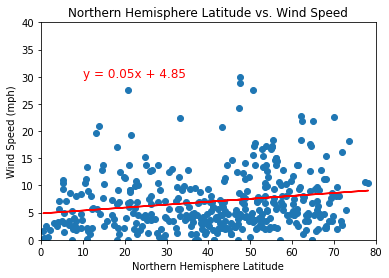

<Figure size 432x288 with 0 Axes>

In [19]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between northern hemisphere latitude and wind speed is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# linear regression line 
yvalues = (northern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
plt.plot(northern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(10, 30),fontsize=12,color="red")
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel ("Northern Hemisphere Latitude")
plt.ylabel ("Wind Speed (mph)")

#axes limits
plt.ylim(0, 40)
plt.xlim(0, 80)

#display the plot
plt.show()

#save image
plt.savefig("Images/nh_lat_windspeed_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between southern hemisphere latitude and wind speed is -0.27.


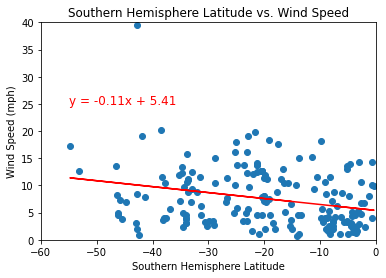

<Figure size 432x288 with 0 Axes>

In [20]:
#determine St. Pearson Correlation Coefficient
correlation = round(st.pearsonr(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])[0],2)

#print St. Pearson Correlation Coefficient
print(f"The correlation between southern hemisphere latitude and wind speed is {correlation:.2f}.")

# establish linear regression values
model = st.linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# linear regression line 
yvalues = (southern_hemisphere["Lat"] * model[0]) + model[1]
line_eq = "y = " + str(round(model[0],2)) + "x + " + str(round(model[1],2))

# scatter plot of the data
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
plt.plot(southern_hemisphere["Lat"], yvalues, color = "red")

#annotation and labels
plt.annotate(line_eq,(-55, 25),fontsize=12,color="red")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.xlabel ("Southern Hemisphere Latitude")
plt.ylabel ("Wind Speed (mph)")

#axes limits
plt.ylim(0, 40)
plt.xlim(-60, 0)

#display the plot
plt.show()

#save image
plt.savefig("Images/sh_lat_windspeed_regression.png")